In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
os.getcwd()

'C:\\Users\\Inbarasan Mani\\Deep Learning'

## Data Preprocessing

In [3]:
# Importing dataset - Churn_Modelling.csv


data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# Seleecting dependent and independent variables
data.columns

#dependent column will be y 

x = data.drop(labels = ['RowNumber', 'CustomerId', 'Surname','Exited'], axis = 1)
y = data['Exited']

In [7]:
print(x.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
print('Geography column in the dataset is containing of ',data['Geography'].unique())
print("Gender column's unique values is ",data['Gender'].unique())

Geography column in the dataset is containing of  ['France' 'Spain' 'Germany']
Gender column's unique values is  ['Female' 'Male']


In [10]:
# Encoding the categorical data

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
x['Geography'] = encoder.fit_transform(x['Geography'])
x['Gender'] = encoder.fit_transform(x['Gender'])

In [11]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [12]:
# Avoiding the dummy variable trap

x = pd.get_dummies(x, drop_first = True,columns = ['Geography'] )

In [13]:
x.head(15)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,0


In [14]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [15]:
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (8000, 11)
Shape of x_test:  (2000, 11)
Shape of y_train:  (8000,)
Shape of y_test:  (2000,)


In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [17]:
x_train

array([[ 0.16958176, -1.09168714, -0.46460796, ...,  1.10643166,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -0.74866447,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  1.48533467,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  1.41231994,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ...,  0.84432121,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ...,  0.32472465,
         1.75486502, -0.57369368]])

In [18]:
x_test

array([[-0.55204276, -1.09168714, -0.36890377, ...,  1.61085707,
         1.75486502, -0.57369368],
       [-1.31490297, -1.09168714,  0.10961719, ...,  0.49587037,
        -0.5698444 , -0.57369368],
       [ 0.57162971, -1.09168714,  0.30102557, ..., -0.42478674,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227,  0.91601335, -0.27319958, ...,  0.71888467,
        -0.5698444 ,  1.74309049],
       [-0.00566991,  0.91601335, -0.46460796, ..., -1.54507805,
         1.75486502, -0.57369368],
       [-0.79945688,  0.91601335, -0.84742473, ...,  1.61255917,
         1.75486502, -0.57369368]])

## Building the model

In [19]:
# creation of object (initialize the ANN)

model = tf.keras.models.Sequential()

# Sequential - model initalization helps to connect the neurons in regular manner


In [20]:
x.shape

(10000, 11)

In [21]:
# Adding Input Layer and First Hidden Layer

'''
1) units = 6
2) activation function = reLU
3) input dimension = 11

trick: take the average of input and output
'''

model.add(tf.keras.layers.Dense(units= 6,
                               activation = 'relu',
                               input_dim = 11))

In [22]:
# Adding Hidden Layers

model.add(tf.keras.layers.Dense(units =6,
                               activation = 'relu'))

In [23]:
# Output Layer
'''
here the units is specified as 1 due to the result is of 1 or 0

'''
model.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid' ))

## Compiling the model



In [24]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [26]:
model.fit(x_train, y_train.to_numpy(), batch_size = 10, epochs = 20, verbose = 2)

Epoch 1/20
800/800 - 1s - loss: 0.4705 - accuracy: 0.7956
Epoch 2/20
800/800 - 1s - loss: 0.4376 - accuracy: 0.8071
Epoch 3/20
800/800 - 1s - loss: 0.4269 - accuracy: 0.8120
Epoch 4/20
800/800 - 1s - loss: 0.4213 - accuracy: 0.8167
Epoch 5/20
800/800 - 1s - loss: 0.4160 - accuracy: 0.8188
Epoch 6/20
800/800 - 1s - loss: 0.4121 - accuracy: 0.8227
Epoch 7/20
800/800 - 1s - loss: 0.4087 - accuracy: 0.8249
Epoch 8/20
800/800 - 1s - loss: 0.4054 - accuracy: 0.8284
Epoch 9/20
800/800 - 1s - loss: 0.4016 - accuracy: 0.8289
Epoch 10/20
800/800 - 1s - loss: 0.3966 - accuracy: 0.8310
Epoch 11/20
800/800 - 1s - loss: 0.3881 - accuracy: 0.8331
Epoch 12/20
800/800 - 1s - loss: 0.3781 - accuracy: 0.8389
Epoch 13/20
800/800 - 1s - loss: 0.3683 - accuracy: 0.8436
Epoch 14/20
800/800 - 1s - loss: 0.3607 - accuracy: 0.8508
Epoch 15/20
800/800 - 1s - loss: 0.3539 - accuracy: 0.8526
Epoch 16/20
800/800 - 1s - loss: 0.3497 - accuracy: 0.8568
Epoch 17/20
800/800 - 1s - loss: 0.3467 - accuracy: 0.8589
Epoch 

## Model Evaluation and Prediction

In [27]:
# Evaluation

test_loss, test_accuracy = model.evaluate(x_test, y_test.to_numpy())

63/63 [==============================] - 0s 774us/step - loss: 0.3358 - accuracy: 0.8625


In [28]:
print(f" Model's Loss {test_loss * 100} and Model's Accuracy {test_accuracy * 100}")

 Model's Loss 33.584848046302795 and Model's Accuracy 86.2500011920929


In [29]:
y_pred = model.predict(x_test)

In [30]:
y_pred = np.round(y_pred).astype(int)

In [31]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
print(y_test)

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64


In [33]:
# Y_pred is predicted value whereas y_test is actual value

y_pred[126], y_test[126]

(array([0]), 1)

In [34]:
y_pred[1540],y_test[1540]

(array([0]), 0)

In [36]:
y_pred[635], y_test[635]

(array([0]), 0)

## Metrics Computation and Results

In [37]:
from sklearn.metrics  import confusion_matrix, accuracy_score

cm = confusion_matrix (y_test, y_pred)
cm

array([[1512,   83],
       [ 192,  213]], dtype=int64)

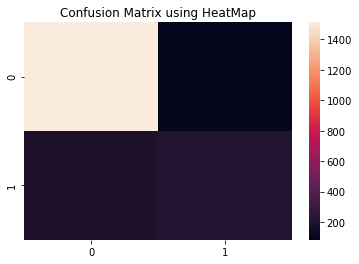

In [38]:
sns.heatmap(data = cm)
plt.title('Confusion Matrix using HeatMap');

In [39]:
acc_score = accuracy_score (y_test, y_pred)
print('Accuracy Score: ',acc_score)

Accuracy Score:  0.8625
